In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./data/review_dataset_v6.csv', index_col=0) #.dropna().reset_index()
df

,index,id,search_word,title,url,blog_name,date,content,content_len,content_hash_cnt,...,image_ocr_text_v2,repeat_word_cnt,noun_verb_ratio,label,ocr_label,label_v2,correct,label_f,ocrlb_lbv2,label_f2
0,0,shuenmama.223027650182,홍대 회식 맛집,홍대 고기집 데이트 쟁반한상 삼겹살 맛집 회식 쟁반집8292,https://blog.naver.com/shuenmama/223027650182,shuen,20230225,홍대에서 데이트 하기로 한 주말\n진짜 간만에 홍대\n전에 항상 세우던 공영주차장이...,3094,10,...,@@ 지지 도 토 그 내주 기...,114,2.533333,1,1,1,1.0,1.0,1,1.0
1,1,rosepink1974.223153722255,홍대 회식 맛집,홍대삼겹살 청년화로 1987 이베리코 연남동고기집 회식맛집,https://blog.naver.com/rosepink1974/223153722255,예쁜 달코미의 단맛 인생,20230712,청년화로1987\n서울 마포구 동교로 219 1층\n청년화로 1987\n홍대입구역 ...,2345,9,...,누르츠 터뜨 해 자트족때스스로 서 그 벼세 구주개님 ...,70,3.783505,0,1,1,0.0,0.0,1,0.0
2,2,mou25.223209216526,홍대 회식 맛집,"합정 맛집 홍대 회식장소로 딱, 느낌 있는 소고기 고깃집...",https://blog.naver.com/mou25/223209216526,생애 기록장,20230912,"매번 느끼는 거지만,\n회식장소 하나는\n기가 막히게 섭외하는 울 주임님.\n\n얼...",2904,12,...,@@@@@@@@@@@@@@@@@@@@@@@@@@@@터해기 수 소공 고초 여 ...,51,3.032680,1,1,1,1.0,1.0,1,1.0
3,3,lulu_l.223118434610,홍대 회식 맛집,"홍대 맛집 합정 갈비가 부드러운 소고기집 연막탄 회식, 데이트...",https://blog.naver.com/lulu_l/223118434610,안나의 일상공유,20230602,홍대 소고기 맛집\n연막탄\n\n남자친구가 맛있는 고깃집을 알고\n있다길해 합정 맛...,2810,0,...,님녹 송 노즈 오오 로 재 아니기가저개 글오구 ...,53,2.415301,1,1,1,1.0,1.0,1,1.0
4,4,ruston_.223161590597,홍대 회식 맛집,"홍대회식, 육즙 폭발하는 소고기 맛집 '일편등심 홍대본점'",https://blog.naver.com/ruston_/223161590597,로빈이 토끼란 사실을 알고있었나?,20230720,안녕하세요. LoLCake입니다.\n\n\n최근 이직을 준비하는 동료의 축하 파티를...,2299,2,...,@@@@콜로우수 회 를 개일편등심테이블예약유명한홍대일편단심답게고...,41,3.245902,1,1,1,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,10484,suitbull.222112955908,영등포 데이트 맛집,"영등포 돈까스 맛집, 타임스퀘어 데이트 ::간코::",https://blog.naver.com/suitbull/222112955908,SUITBULL(숯불)의 미식 그리고 풍류,20201011,안녕하세요.\n\n미식을 즐기는\n악식가(樂食家)\nSUITBULL (숯불) 입니다...,1642,0,...,제 잉 넥 보 ...,34,3.324675,1,1,0,NaN,1.0,1,1.0
9997,10485,dusal0652.222413131913,영등포 데이트 맛집,[영등포 문래동] 문래창작촌에서도 유명한 양키통닭,https://blog.naver.com/dusal0652/222413131913,기록하는 습관,20210628,날씨가 좋은 어느 날\n문래에서 일어난 일ㅎㅎㅎㅎㅎ\n\n친구랑 같이 가기로 한 '...,1996,12,...,가기을@@@@@@ 가리라로법 겸쓰간 내 안이 월요일 금요일 오...,12,2.191667,0,0,0,NaN,0.0,0,0.0
9998,10486,shinesparis.221509975993,영등포 데이트 맛집,영등포역 맛집 '럭치미' 인도요리 커리 완전맛있어~!,https://blog.naver.com/shinesparis/221509975993,귀여운 서소남매,20190410,인도요리를 좋아하는편이라 신랑이랑 가끔 먹으러가곤한다.\n영등포역에 위치한 인도요리...,2350,0,...,@@씩 구아족 주슬드부쁘 홈 때 태미에...,50,3.654545,0,0,0,NaN,0.0,0,0.0
9999,10487,sleeping_yulmu.223070079287,영등포 데이트 맛집,[서울/여의도] 블링 블링 빛이 나는 맛 좋은 삼겹살! '돈블랑...,https://blog.naver.com/sleeping_yulmu/22307007...,sleeping_day,20230410,예년보다 벚꽃이 일찍 개화한 올해!\n친구들과 꽃놀이는 빼놓을 수가 없죠.\n함께 ...,1745,40,...,어 도@@ 기이해래 지사익 ...,29,3.573770,0,0,0,NaN,0.0,0,0.0


In [3]:
df.columns

Index(['index', 'id', 'search_word', 'title', 'url', 'blog_name', 'date',
       'content', 'content_len', 'content_hash_cnt', 'article_hash_cnt',
       'like_cnt', 'emoticon_cnt', 'total_post', 'adpost_yn', 'link_cnt',
       'map_yn', 'video_yn', 'phone_yn', 'image_cnt', 'image_ocr_text_v2',
       'repeat_word_cnt', 'noun_verb_ratio', 'label', 'ocr_label', 'label_v2',
       'correct', 'label_f', 'ocrlb_lbv2', 'label_f2'],
      dtype='object')

In [4]:
categorical_col = ['adpost_yn', 'map_yn', 'video_yn', 'phone_yn']
numerical_col = ['content_len', 'content_hash_cnt', 'article_hash_cnt', 'like_cnt', 'emoticon_cnt', 
                 'total_post', 'link_cnt', 'image_cnt', 'repeat_word_cnt', 'noun_verb_ratio']
label_col = 'label_f2'

In [5]:
df = df[df.noun_verb_ratio < np.inf].reset_index()

In [6]:
uid = df['id'].tolist()
X = df[categorical_col + numerical_col].values
y = df[label_col].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=222)

### NaiveBayes

In [31]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.688

### RFC

In [32]:
model = RandomForestClassifier(max_depth=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7265

In [33]:
model.score(X_train, y_train)

0.7342421210605302

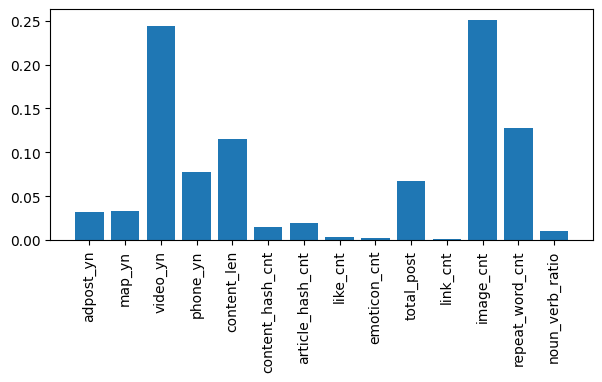

In [34]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [35]:
preds = model.predict(X_test)

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66       908
         1.0       0.71      0.85      0.77      1092

    accuracy                           0.73      2000
   macro avg       0.73      0.71      0.72      2000
weighted avg       0.73      0.73      0.72      2000



### XGB

In [37]:
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7195

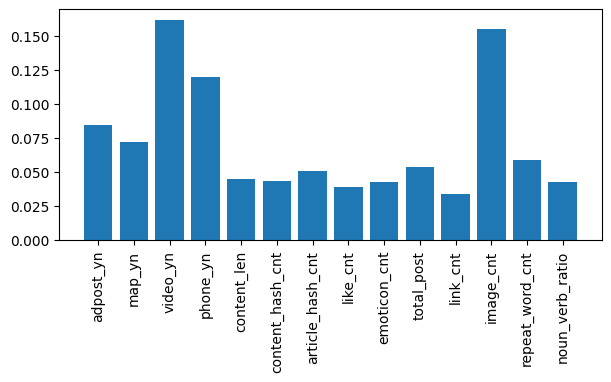

In [38]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### LGBM

In [39]:
model = LGBMClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7315

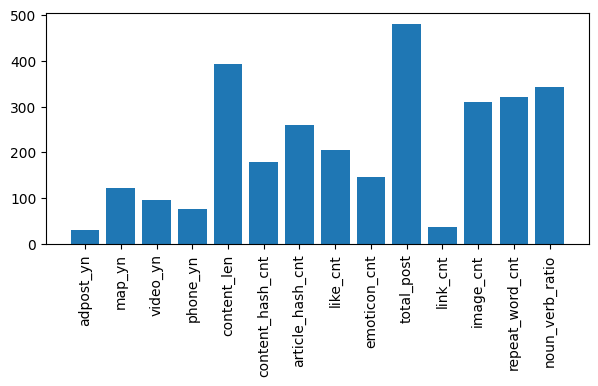

In [40]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### LogisticRegression

In [41]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7075

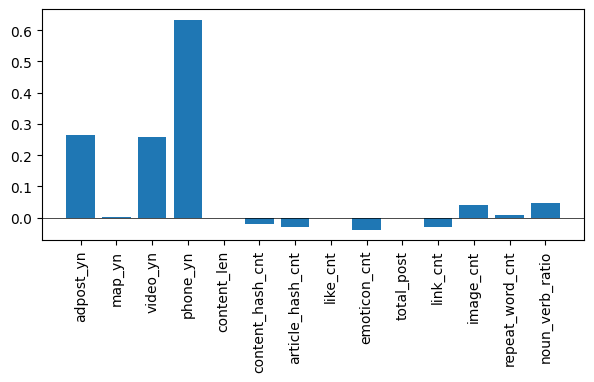

In [42]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.coef_[0])
plt.xticks(rotation=90)
plt.axhline(y=0, c='black', lw=0.5)
plt.show()

### SVC

In [43]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6665

### KNN

In [44]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6345

## FineTuning

### LogisticRegression

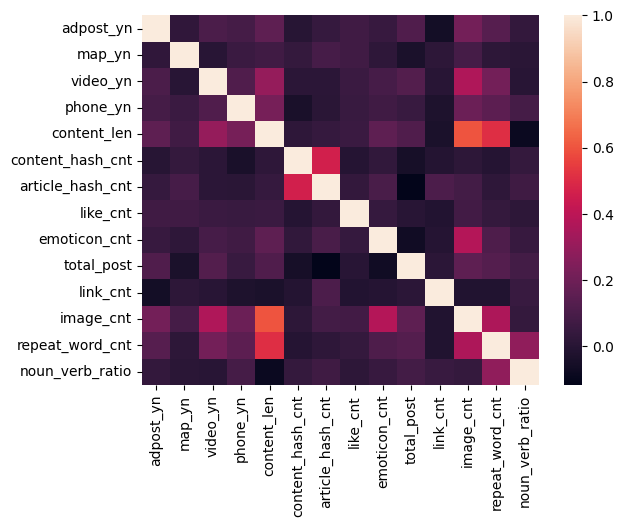

In [21]:
sns.heatmap(df[categorical_col + numerical_col].corr())
plt.show()

In [22]:
model = LogisticRegression(
    max_iter=10000
)
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.7088544272136068
Test Score: 0.706


In [23]:
%%time
lr = LogisticRegression()
params = {
    'dual': [False, True],
    'tol': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'C': [1.0, 0.5, 0.1, 0.01, 0.001],
    'fit_intercept': [False, True],
    'intercept_scaling': [2, 1, 0.5, 0.1],
    'max_iter': [5000],
    'warm_start': [True, False]
}

grid = GridSearchCV(
    lr,
    param_grid=params,
    cv=4,
#     error_score='raise'
)

grid.fit(X_train, y_train)

Exception ignored in: <function Booster.__del__ at 0x7fe69b399c60>
Traceback (most recent call last):
  File "/home/jcwee/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py", line 1651, in __del__
    def __del__(self) -> None:
KeyboardInterrupt: 

KeyboardInterrupt



In [75]:
grid.best_params_

{'C': 0.01,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 2,
 'max_iter': 5000,
 'tol': 1,
 'warm_start': True}

In [24]:
model = LogisticRegression(
    C=1,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=10000,
    tol=1,
    warm_start=True
)
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.7088544272136068
Test Score: 0.706


### RandomForest

In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.733


In [ ]:
%%time
rfc = RandomForestClassifier()
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'max_depth': [4, 8, 12, None],
    'min_samples_split': [1, 2, 3, 4, 0.5, 0.7],
    'min_samples_leaf': [1, 2, 4],
    'warm_start': [True, False]
}

grid = GridSearchCV(
    rfc,
    param_grid=params,
    cv=4,
)

grid.fit(X_train, y_train)

In [90]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'warm_start': False}

In [91]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [47]:
model = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1000,
    warm_start=False
)
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.7385


### XGBOOST

In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.9298399199599799
Test Score: 0.726


In [11]:
%%time
xgb = XGBClassifier()
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [4, 8, 12, None],
    'max_leaves': [0, 4, 8, 16],
    'min_samples_split': [1, 2, 3, 4, 0.5, 0.7],
    'min_samples_leaf': [1, 2, 4],
    'warm_start': [True, False]
}

grid = GridSearchCV(
    xgb,
    param_grid=params,
    cv=4,
)

grid.fit(X_train, y_train)

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[15:59:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[15:59:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:00:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:00:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:01:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:01:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:02:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:02:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:02:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:03:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:03:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:03:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:04:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:04:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:04:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:05:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:05:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:06:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:06:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:06:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:07:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:07:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:07:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:08:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:08:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:09:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:09:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:10:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:10:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:10:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:11:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:11:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:11:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:12:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:12:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:13:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:13:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:14:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:14:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:15:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:15:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:16:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:17:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:18:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:18:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:19:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:19:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:20:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:20:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:21:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:21:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:22:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:22:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:23:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:23:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:23:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:23:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:23:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:24:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:24:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:25:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:25:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:26:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:27:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:28:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:28:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:29:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:29:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:30:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:30:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:31:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:31:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:32:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:32:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:33:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:33:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:34:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:34:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:35:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:35:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:37:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:37:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:37:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:37:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:37:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:37:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:38:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:39:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:39:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:40:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:40:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:41:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:41:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:42:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:42:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:43:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:43:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:45:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:45:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:46:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:46:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:47:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:47:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:47:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:47:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:47:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:47:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:47:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:48:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:49:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:49:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:50:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:50:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:51:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:51:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:51:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:51:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:52:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:52:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:52:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:52:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:53:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:53:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:54:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:54:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:55:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:56:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:57:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:57:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[16:58:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[16:58:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:00:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:00:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:01:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:01:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:02:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:02:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:04:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:04:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:05:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:05:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:06:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:06:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:08:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:08:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:09:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:09:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:10:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:10:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:10:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:10:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:10:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:10:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:11:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:11:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:12:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:12:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:13:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:13:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:15:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:15:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:16:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:16:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:19:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:19:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:20:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:20:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:21:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:21:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:22:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:22:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:23:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:23:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:23:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:24:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:24:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:25:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:25:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:26:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:26:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:27:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:27:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:28:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:28:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:28:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:29:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:29:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:30:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:30:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:31:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:31:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:32:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:32:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:32:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:33:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:33:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:34:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:34:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:35:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:35:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:36:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:36:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:37:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:37:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:37:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:38:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:38:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:39:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:39:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

[17:40:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

[17:40:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split"

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 8, 12, None],
                         'max_leaves': [0, 4, 8, 16],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 3, 4, 0.5, 0.7],
                         'n_estimators': [100, 500, 1000],
                         'warm_start': [True, False]})

In [13]:
grid.best_params_

{'max_depth': 4,
 'max_leaves': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 100,
 'warm_start': True}

In [28]:
model = XGBClassifier(
    max_depth=4,
    max_leaves=0,
    min_samples_leaf=1,
    min_samples_split=1,
    n_estimators=100,
    warm_start=True
)
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

[19:29:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "warm_start" } are not used.

Train Score: 0.8342921460730365
Test Score: 0.7335


### LGBM

In [29]:
model = LGBMClassifier()
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.8494247123561781
Test Score: 0.734


In [ ]:
%%time
lgbm = LGBMClassifier()
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [4, 8, 12, -1],
    'max_leaves': [0, 8, 16, 31, 64],
    'learning_rate': [0.1, 0.01, 0.001, 1],
    'subsample': [1.0, 0.7, 0.5]
}

grid = GridSearchCV(
    lgbm,
    param_grid=params,
    cv=4,
)

grid.fit(X_train, y_train)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current v

[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=16 will be ignored.

In [18]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'max_leaves': 0,
 'n_estimators': 1000,
 'subsample': 1.0}

In [44]:
model = LGBMClassifier(
    learning_rate=0.01,
    max_depth=4,
    max_leaves=0,
    n_estimators=1000,
    subsample=1
)
model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

[LightGBM] [Warning] num_leaves is set=31, max_leaves=0 will be ignored. Current value: num_leaves=31
Train Score: 0.784767383691846
Test Score: 0.7285


In [33]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [36]:
clf = TabNetClassifier()  #TabNetRegressor()
clf.fit(
  X_train, y_train,
  eval_set=[(X_test, y_test)]
)
preds = clf.predict(X_test)

epoch 0  | loss: 0.69    | val_0_auc: 0.45156 |  0:00:00s
epoch 1  | loss: 0.62619 | val_0_auc: 0.48455 |  0:00:00s
epoch 2  | loss: 0.61783 | val_0_auc: 0.5753  |  0:00:01s
epoch 3  | loss: 0.60494 | val_0_auc: 0.56036 |  0:00:01s
epoch 4  | loss: 0.6032  | val_0_auc: 0.488   |  0:00:01s
epoch 5  | loss: 0.59356 | val_0_auc: 0.49165 |  0:00:01s
epoch 6  | loss: 0.59126 | val_0_auc: 0.51207 |  0:00:01s
epoch 7  | loss: 0.59264 | val_0_auc: 0.56012 |  0:00:01s
epoch 8  | loss: 0.58481 | val_0_auc: 0.57584 |  0:00:01s
epoch 9  | loss: 0.58077 | val_0_auc: 0.59763 |  0:00:01s
epoch 10 | loss: 0.57603 | val_0_auc: 0.64452 |  0:00:01s
epoch 11 | loss: 0.57724 | val_0_auc: 0.67566 |  0:00:01s
epoch 12 | loss: 0.57242 | val_0_auc: 0.68896 |  0:00:02s
epoch 13 | loss: 0.57361 | val_0_auc: 0.69933 |  0:00:02s
epoch 14 | loss: 0.57426 | val_0_auc: 0.7086  |  0:00:02s
epoch 15 | loss: 0.56805 | val_0_auc: 0.71209 |  0:00:02s
epoch 16 | loss: 0.56087 | val_0_auc: 0.72816 |  0:00:02s
epoch 17 | los

/home/jcwee/anaconda3/envs/torch/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [37]:
from sklearn.metrics import classification_report

In [48]:
preds = model.predict(X_test)

In [49]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.78      0.58      0.67       908
         1.0       0.72      0.87      0.78      1092

    accuracy                           0.74      2000
   macro avg       0.75      0.73      0.73      2000
weighted avg       0.75      0.74      0.73      2000



In [46]:
preds

LGBMClassifier(learning_rate=0.01, max_depth=4, max_leaves=0, n_estimators=1000,
               subsample=1)

In [39]:

preds

array([1., 1., 1., ..., 0., 1., 1.])

In [50]:
X

array([[  3.        ,   1.        ,   1.        , ...,  35.        ,
        114.        ,   2.53333333],
       [  3.        ,   1.        ,   1.        , ...,  45.        ,
         70.        ,   3.78350515],
       [  3.        ,   1.        ,   0.        , ...,  34.        ,
         51.        ,   3.03267974],
       ...,
       [  3.        ,   2.        ,   0.        , ...,  42.        ,
         50.        ,   3.65454545],
       [  3.        ,   1.        ,   0.        , ...,  12.        ,
         29.        ,   3.57377049],
       [  3.        ,   0.        ,   0.        , ...,  99.        ,
          0.        ,   2.7312253 ]])

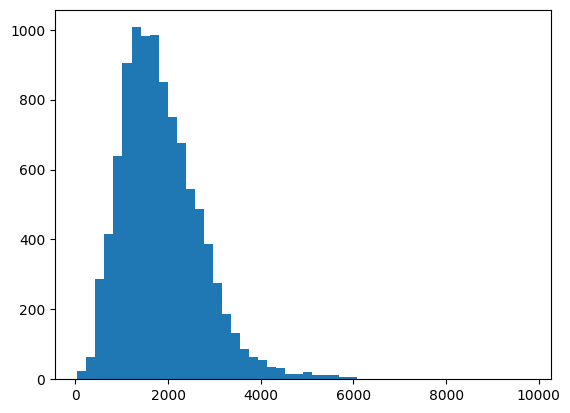

In [57]:
import matplotlib.pyplot as plt
plt.hist(df.content_len, bins=50)
plt.show()

In [58]:
import seaborn as sns

In [59]:
df

,level_0,index,id,search_word,title,url,blog_name,date,content,content_len,...,image_ocr_text_v2,repeat_word_cnt,noun_verb_ratio,label,ocr_label,label_v2,correct,label_f,ocrlb_lbv2,label_f2
0,0,0,shuenmama.223027650182,홍대 회식 맛집,홍대 고기집 데이트 쟁반한상 삼겹살 맛집 회식 쟁반집8292,https://blog.naver.com/shuenmama/223027650182,shuen,20230225,홍대에서 데이트 하기로 한 주말\n진짜 간만에 홍대\n전에 항상 세우던 공영주차장이...,3094,...,@@ 지지 도 토 그 내주 기...,114,2.533333,1,1,1,1.0,1.0,1,1.0
1,1,1,rosepink1974.223153722255,홍대 회식 맛집,홍대삼겹살 청년화로 1987 이베리코 연남동고기집 회식맛집,https://blog.naver.com/rosepink1974/223153722255,예쁜 달코미의 단맛 인생,20230712,청년화로1987\n서울 마포구 동교로 219 1층\n청년화로 1987\n홍대입구역 ...,2345,...,누르츠 터뜨 해 자트족때스스로 서 그 벼세 구주개님 ...,70,3.783505,0,1,1,0.0,0.0,1,0.0
2,2,2,mou25.223209216526,홍대 회식 맛집,"합정 맛집 홍대 회식장소로 딱, 느낌 있는 소고기 고깃집...",https://blog.naver.com/mou25/223209216526,생애 기록장,20230912,"매번 느끼는 거지만,\n회식장소 하나는\n기가 막히게 섭외하는 울 주임님.\n\n얼...",2904,...,@@@@@@@@@@@@@@@@@@@@@@@@@@@@터해기 수 소공 고초 여 ...,51,3.032680,1,1,1,1.0,1.0,1,1.0
3,3,3,lulu_l.223118434610,홍대 회식 맛집,"홍대 맛집 합정 갈비가 부드러운 소고기집 연막탄 회식, 데이트...",https://blog.naver.com/lulu_l/223118434610,안나의 일상공유,20230602,홍대 소고기 맛집\n연막탄\n\n남자친구가 맛있는 고깃집을 알고\n있다길해 합정 맛...,2810,...,님녹 송 노즈 오오 로 재 아니기가저개 글오구 ...,53,2.415301,1,1,1,1.0,1.0,1,1.0
4,4,4,ruston_.223161590597,홍대 회식 맛집,"홍대회식, 육즙 폭발하는 소고기 맛집 '일편등심 홍대본점'",https://blog.naver.com/ruston_/223161590597,로빈이 토끼란 사실을 알고있었나?,20230720,안녕하세요. LoLCake입니다.\n\n\n최근 이직을 준비하는 동료의 축하 파티를...,2299,...,@@@@콜로우수 회 를 개일편등심테이블예약유명한홍대일편단심답게고...,41,3.245902,1,1,1,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9996,10484,suitbull.222112955908,영등포 데이트 맛집,"영등포 돈까스 맛집, 타임스퀘어 데이트 ::간코::",https://blog.naver.com/suitbull/222112955908,SUITBULL(숯불)의 미식 그리고 풍류,20201011,안녕하세요.\n\n미식을 즐기는\n악식가(樂食家)\nSUITBULL (숯불) 입니다...,1642,...,제 잉 넥 보 ...,34,3.324675,1,1,0,NaN,1.0,1,1.0
9992,9997,10485,dusal0652.222413131913,영등포 데이트 맛집,[영등포 문래동] 문래창작촌에서도 유명한 양키통닭,https://blog.naver.com/dusal0652/222413131913,기록하는 습관,20210628,날씨가 좋은 어느 날\n문래에서 일어난 일ㅎㅎㅎㅎㅎ\n\n친구랑 같이 가기로 한 '...,1996,...,가기을@@@@@@ 가리라로법 겸쓰간 내 안이 월요일 금요일 오...,12,2.191667,0,0,0,NaN,0.0,0,0.0
9993,9998,10486,shinesparis.221509975993,영등포 데이트 맛집,영등포역 맛집 '럭치미' 인도요리 커리 완전맛있어~!,https://blog.naver.com/shinesparis/221509975993,귀여운 서소남매,20190410,인도요리를 좋아하는편이라 신랑이랑 가끔 먹으러가곤한다.\n영등포역에 위치한 인도요리...,2350,...,@@씩 구아족 주슬드부쁘 홈 때 태미에...,50,3.654545,0,0,0,NaN,0.0,0,0.0
9994,9999,10487,sleeping_yulmu.223070079287,영등포 데이트 맛집,[서울/여의도] 블링 블링 빛이 나는 맛 좋은 삼겹살! '돈블랑...,https://blog.naver.com/sleeping_yulmu/22307007...,sleeping_day,20230410,예년보다 벚꽃이 일찍 개화한 올해!\n친구들과 꽃놀이는 빼놓을 수가 없죠.\n함께 ...,1745,...,어 도@@ 기이해래 지사익 ...,29,3.573770,0,0,0,NaN,0.0,0,0.0


In [14]:
jitter_amount=0.5
# x_jittered = df.content_len + np.random.uniform(-jitter_amount, jitter_amount, size=len(df))
y_jittered = 1 + np.random.uniform(-jitter_amount, jitter_amount, size=len(df))


In [15]:
x_jittered

NameError: name 'x_jittered' is not defined

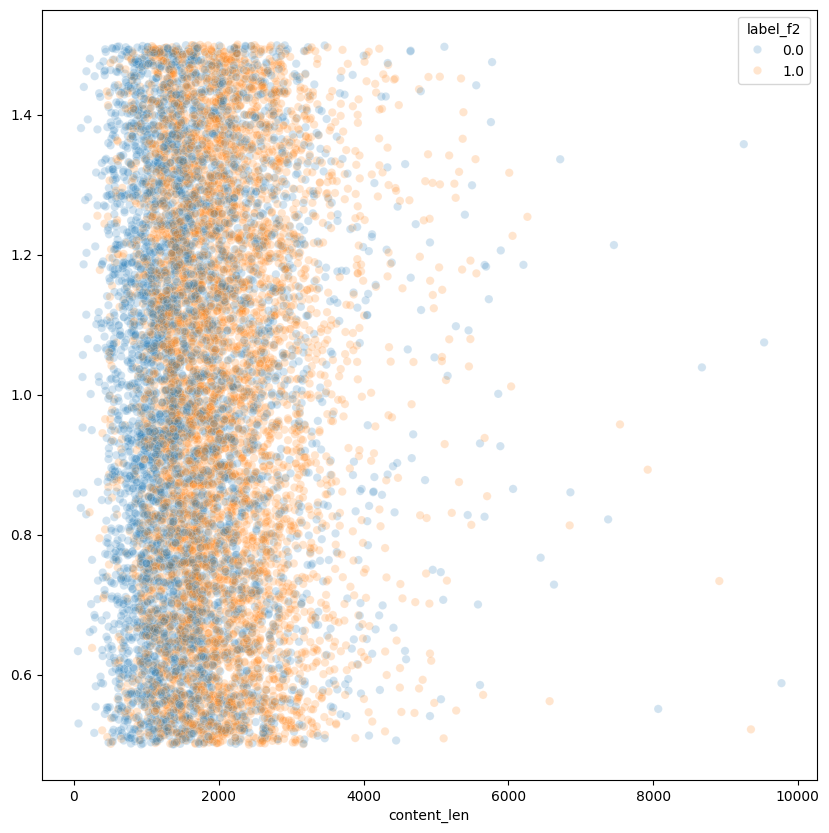

In [17]:
plt.figure(figsize=(10, 10))
sns.scatterplot(df, x='content_len', y=y_jittered, hue='label_f2', alpha=.2)
plt.show()

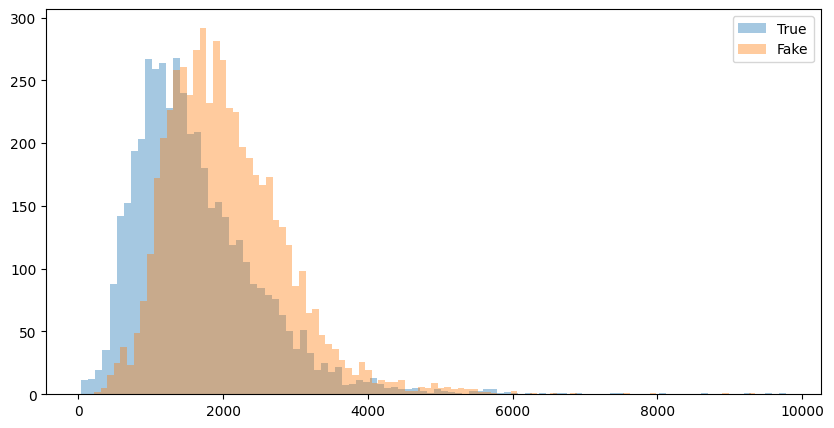

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df[df.label_f2 == 0].content_len, bins=100, alpha=.4, label='True')
plt.hist(df[df.label_f2 == 1].content_len, bins=100, alpha=.4, label='Fake')
plt.legend()
plt.show()

In [37]:
df[(df.content_len >= 2500)]

,level_0,index,id,search_word,title,url,blog_name,date,content,content_len,...,image_ocr_text_v2,repeat_word_cnt,noun_verb_ratio,label,ocr_label,label_v2,correct,label_f,ocrlb_lbv2,label_f2
0,0,0,shuenmama.223027650182,홍대 회식 맛집,홍대 고기집 데이트 쟁반한상 삼겹살 맛집 회식 쟁반집8292,https://blog.naver.com/shuenmama/223027650182,shuen,20230225,홍대에서 데이트 하기로 한 주말\n진짜 간만에 홍대\n전에 항상 세우던 공영주차장이...,3094,...,@@ 지지 도 토 그 내주 기...,114,2.533333,1,1,1,1.0,1.0,1,1.0
2,2,2,mou25.223209216526,홍대 회식 맛집,"합정 맛집 홍대 회식장소로 딱, 느낌 있는 소고기 고깃집...",https://blog.naver.com/mou25/223209216526,생애 기록장,20230912,"매번 느끼는 거지만,\n회식장소 하나는\n기가 막히게 섭외하는 울 주임님.\n\n얼...",2904,...,@@@@@@@@@@@@@@@@@@@@@@@@@@@@터해기 수 소공 고초 여 ...,51,3.032680,1,1,1,1.0,1.0,1,1.0
3,3,3,lulu_l.223118434610,홍대 회식 맛집,"홍대 맛집 합정 갈비가 부드러운 소고기집 연막탄 회식, 데이트...",https://blog.naver.com/lulu_l/223118434610,안나의 일상공유,20230602,홍대 소고기 맛집\n연막탄\n\n남자친구가 맛있는 고깃집을 알고\n있다길해 합정 맛...,2810,...,님녹 송 노즈 오오 로 재 아니기가저개 글오구 ...,53,2.415301,1,1,1,1.0,1.0,1,1.0
7,7,7,jk01128.223201857381,홍대 회식 맛집,"홍대 고기집, 꽃살집 숙성 소고기 화로구이 홍대 회식 연남동 맛집",https://blog.naver.com/jk01128/223201857381,추억을 회상하는 곳에 달빛이 내린다,20230904,안녕하세요. 추억달입니다. (*ฅ́˘ฅ̀*)♡\n\n남자친구가 현재 이직 준비를 하...,2797,...,@@ 호르보구우르르 뽀 으르고스스스요고그을즐 우즈고 주 는 스 즌스스...,82,3.351724,1,1,1,1.0,1.0,1,1.0
8,8,8,aoekdud.223100176598,홍대 회식 맛집,홍대 맛집 가본 사람은 못잊는... 고깃집 연막탄 회식장소 강추,https://blog.naver.com/aoekdud/223100176598,치즈♡,20230512,회사사람들과 함께 다녀 온 음식점을\n소개해 드릴까 하는데 이미 유명한\n곳 중 하...,2812,...,들 빠 고 에들 씨 벼 빅 ...,40,2.416667,0,0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,9977,10465,bboowoo21.222067334587,영등포 데이트 맛집,[영등포/선유도] 깔끔하고... 마라샹궈 맛집 &lt;도미라(哆美辣)...,https://blog.naver.com/bboowoo21/222067334587,뿌메이의 다사다난한 일상,20200822,■ 선유도역 맛집 <도미라 마라탕>에서 마라탕 & 마라샹궈 & 꿔바로우까지 풀로 먹...,3649,...,배스 재에 솔놀 가재주틈 @@@@@@@@@@@@@@ 르벤 시판해벼...,18,2.628141,1,1,1,NaN,1.0,1,1.0
9974,9979,10467,mingmong3.223190804598,영등포 데이트 맛집,여의도 오마카세 스시메이 디너 후기,https://blog.naver.com/mingmong3/223190804598,밍몽의 삶,20230822,#서울오마카세 #오마카세 #여의도오마카세 #오마카세추천 #서울오마카세추천 #영등포오...,2689,...,틱니닌으해고니니내분니네 흘도 부 이가글@@@@@@@@@@ 쁘들 빠이 들 ...,29,2.758170,0,0,0,NaN,0.0,0,0.0
9978,9983,10471,icaruse2.222101085824,영등포 데이트 맛집,"맛집! 간코 타임스퀘어점 (영등포 돈까스, 타임스퀘어 데이트)",https://blog.naver.com/icaruse2/222101085824,댠댠의 블로그,20200927,"돈까스 맛 집은 많이는 아니지만 여기저기 가 봤는데, 여기 돈까스 정말정말 맛있었다...",2576,...,너또뼈 고 @@ 이느느노 왜 에벤매 이 를...,48,3.815789,1,1,1,NaN,1.0,1,1.0
9984,9989,10477,qhrud2117.221676586975,영등포 데이트 맛집,[영등포조개찜] 조개 가득한 조개찜에 닭칼국수까지!...,https://blog.naver.com/qhrud2117/221676586975,엄바나 블로그,20191013,[영등포조개찜] 조개 가득한 조개찜에 닭칼국수까지! '로꼬로꼬조개찜'\n\n진짜 오...,2753,...,@@@@ @@이될 년 베도 가게케래 에 스즈 가 오 르르레가 를 ...,63,3.093525,0,1,1,NaN,1.0,1,1.0
